# Statistical analysis and prediction of stock market in Russia

## Imports and style

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import date
from finam import Timeframe
from data_preprocessing import Data

In [32]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.6}'.format
pd.options.display.precision = 2
pd.options.plotting.backend = 'plotly'
picts_loc = '/mnt/c/Users/Kostya/Pictures/Screenshots/'
data_loc = '/mnt/c/Users/Kostya/data/'

## Descriptive stastistics

In [81]:
tickers = ['SBER', 'GAZP', 'LKOH', 'GMKN', 'YNDX']
df = (Data(ticker, start_date=date(1991, 1, 1), end_date=date(2021, 3, 1), timeframe=Timeframe.DAILY).download()
             for ticker in tickers)
df = (pd.concat(df, keys=tickers, names=['Ticker', 'Date']))

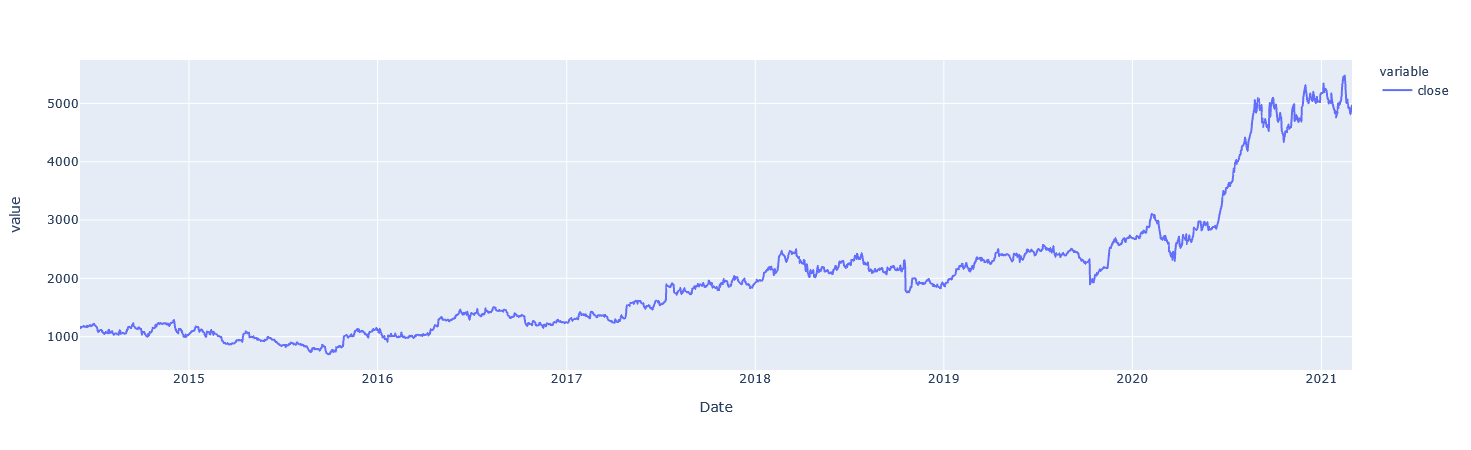

In [86]:
df.loc['YNDX', 'close'].plot()

In [36]:
df.loc['SBER'].describe().T

,count,mean,std,min,25%,50%,75%,max
open,"1,300.0",168.878,60.6435,54.03,119.76,173.775,223.528,280.82
high,"1,300.0",170.821,61.1221,56.77,121.227,175.325,225.918,285.0
low,"1,300.0",166.91,60.0454,53.58,118.178,172.065,221.025,278.59
close,"1,300.0",168.933,60.5697,56.37,119.662,173.795,223.262,279.97
volume,"1,300.0",6.91319e+07,4.20951e+07,6.45054e+06,3.99891e+07,5.60345e+07,8.69736e+07,4.02858e+08


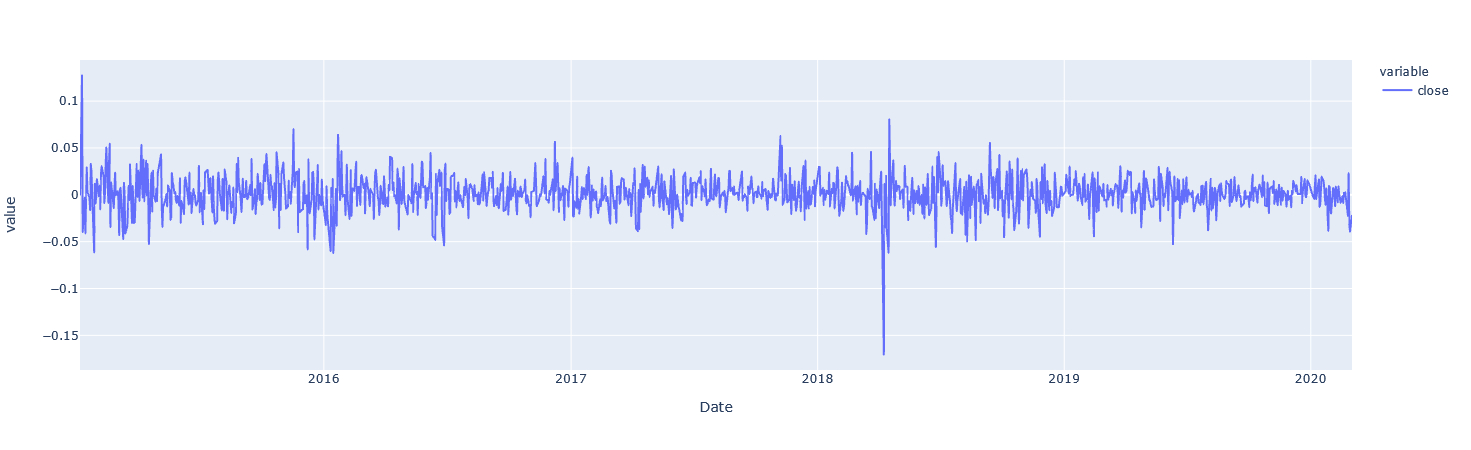

In [39]:
df.loc['SBER', 'close'].pct_change().fillna(0).plot()

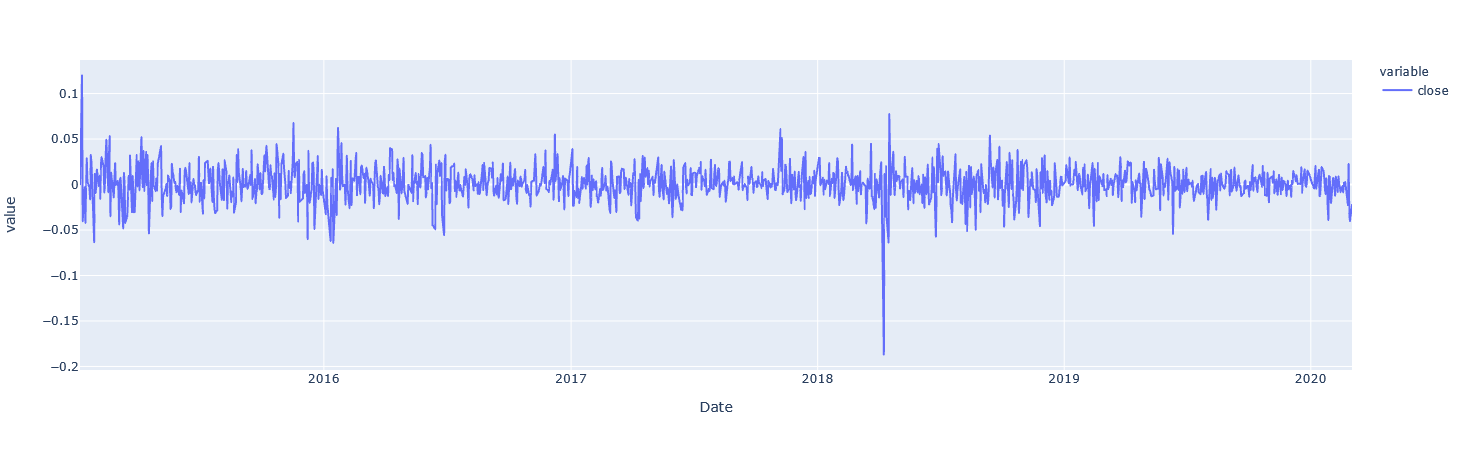

In [53]:
(np.log(df.loc['SBER', 'close'].pct_change().fillna(0)+1)).plot()

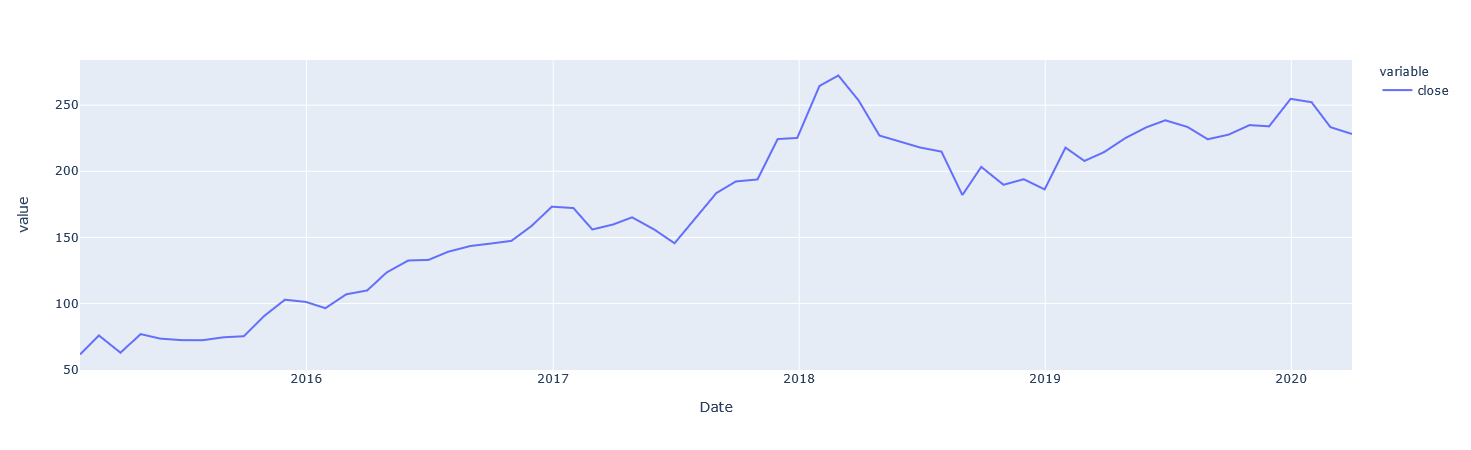

In [41]:
df.loc['SBER', 'close'].resample('BM').apply(lambda x: x[-1]).plot()

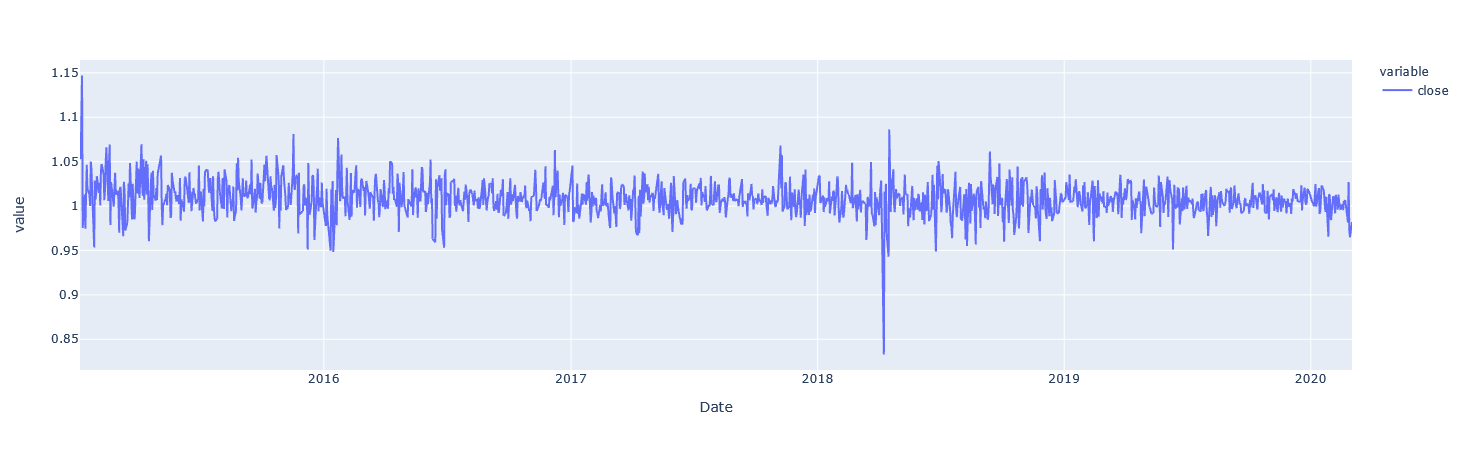

In [52]:
(df.loc['SBER', 'close'] / (df.loc['SBER', 'close'].shift(1) - 1)).plot()

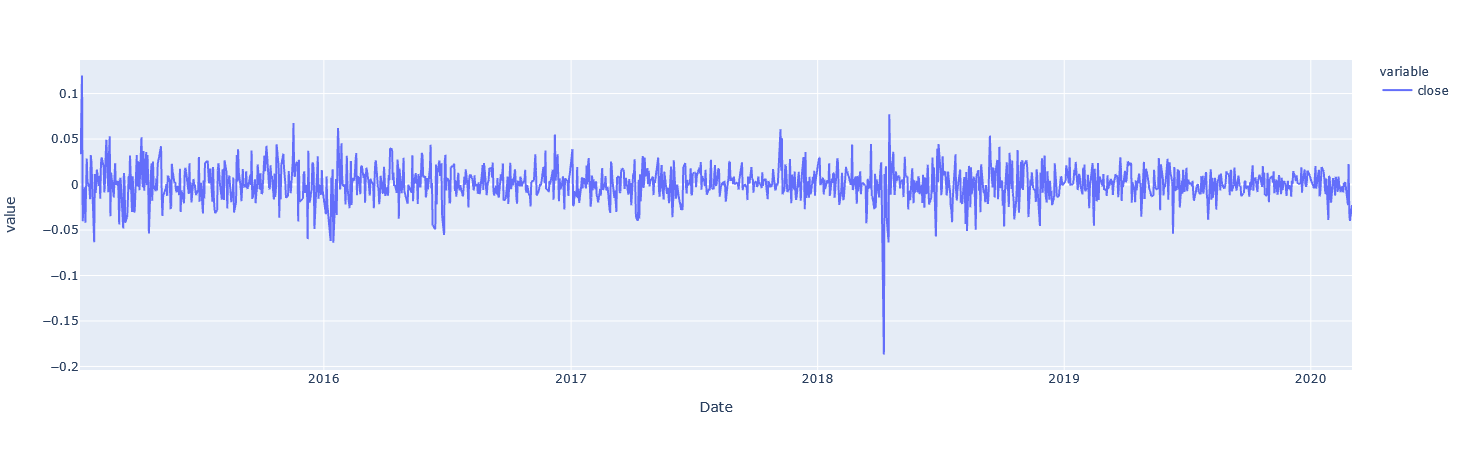

In [50]:
np.log(df.loc['SBER', 'close'] / df.loc['SBER', 'close'].shift(1)).plot()

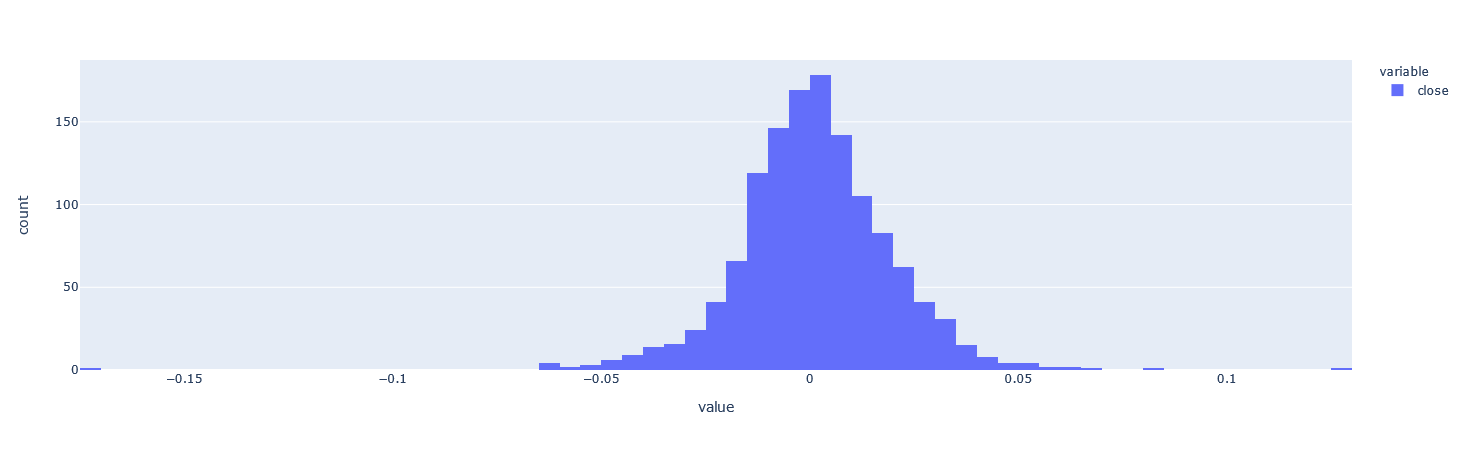

In [49]:
df.loc['SBER', 'close'].pct_change().fillna(0).hist()

In [45]:
df.loc['SBER'].pct_change().fillna(0).describe().T

,count,mean,std,min,25%,50%,75%,max
open,"1,300.0",0.00132421,0.0189822,-0.171933,-0.00823733,0.000635909,0.0123502,0.117148
high,"1,300.0",0.00124821,0.0165118,-0.12076,-0.00785655,0.00108119,0.0100172,0.159453
low,"1,300.0",0.00123465,0.0172736,-0.19925,-0.00733863,0.00186178,0.01013,0.0655439
close,"1,300.0",0.00125085,0.0186549,-0.170432,-0.00906341,0.000708054,0.0117675,0.127316
volume,"1,300.0",0.0836135,0.492538,-0.904508,-0.20997,-0.0214636,0.260399,5.22434


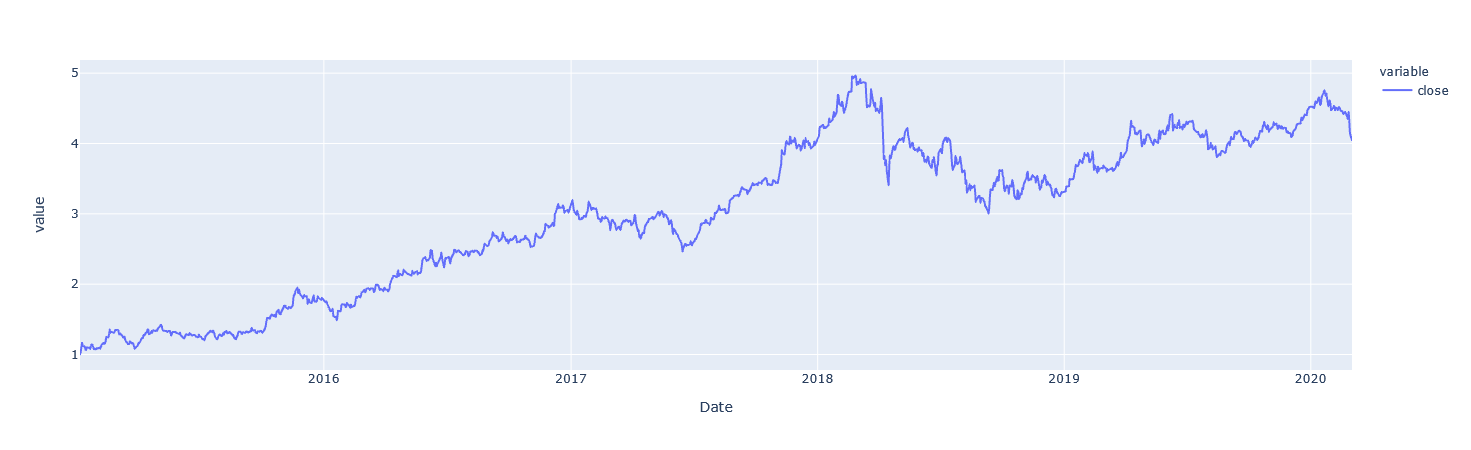

In [46]:
(1 + df.loc['SBER', 'close'].pct_change().fillna(0)).cumprod().plot()

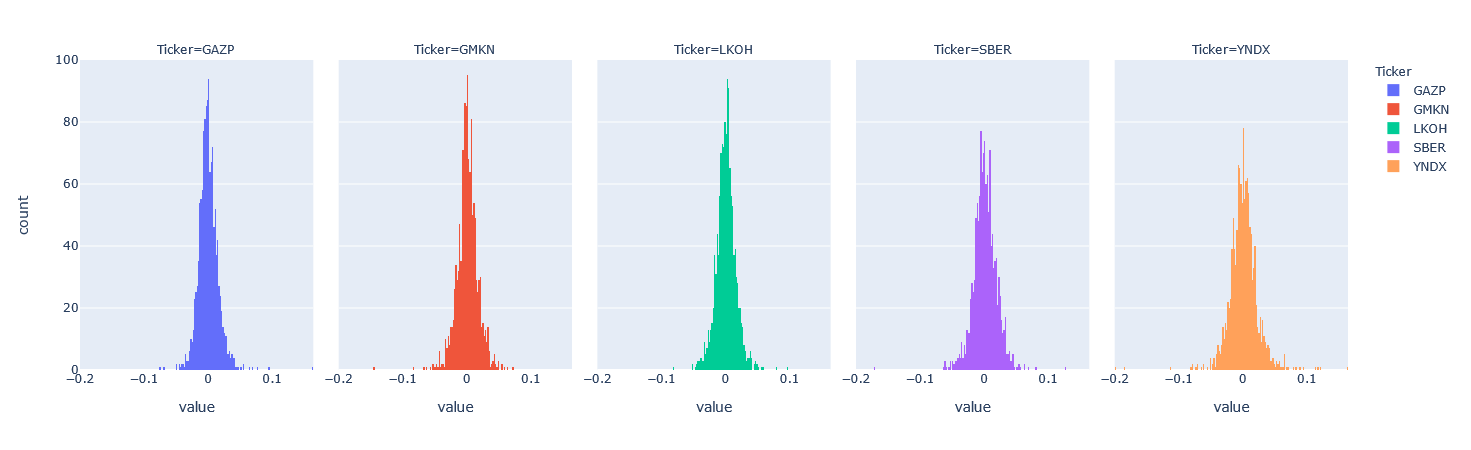

In [62]:
daily_close_px = df[['close']].reset_index().pivot('Date', 'Ticker', 'close')
daily_pct_change = daily_close_px.pct_change()
px.histogram(daily_pct_change, facet_col='Ticker')

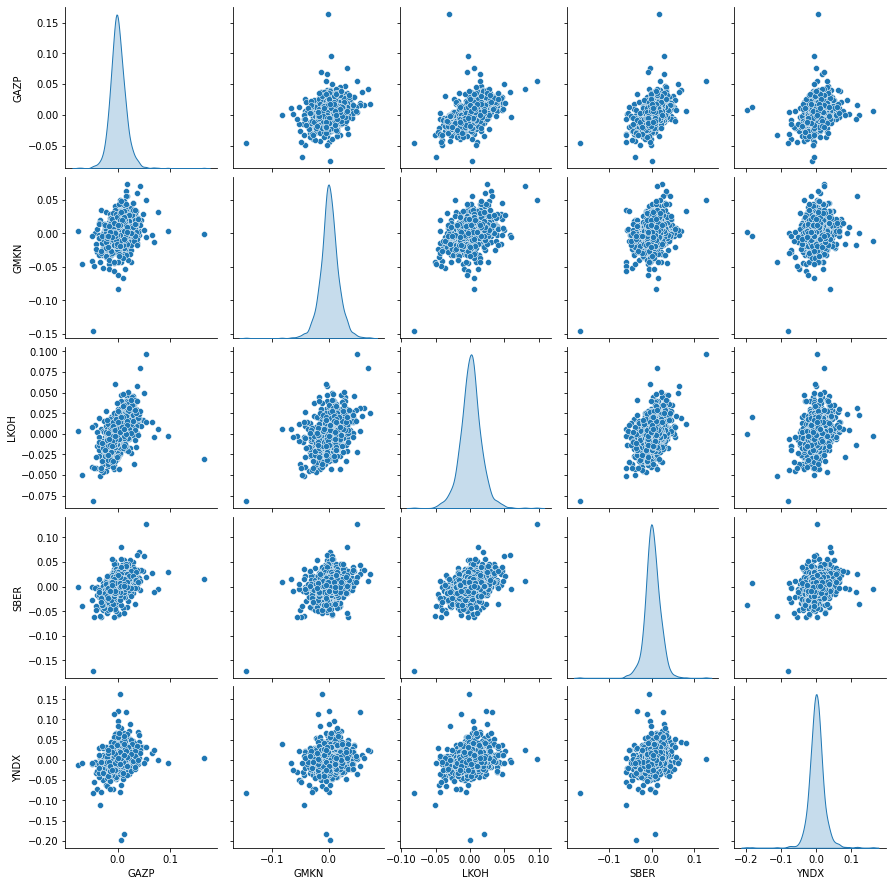

In [68]:
sns.pairplot(daily_pct_change, diag_kind='kde')